In [0]:
#Imports and preamble
#Carl Östling & Erik Gunnarsson
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# KMeans on default data

In [0]:
#Loads the data, currently using the google colab, DON'T FORGET TO CHANGE!
all_protein = pd.read_csv("/content/data_all.csv")

<function matplotlib.pyplot.close>

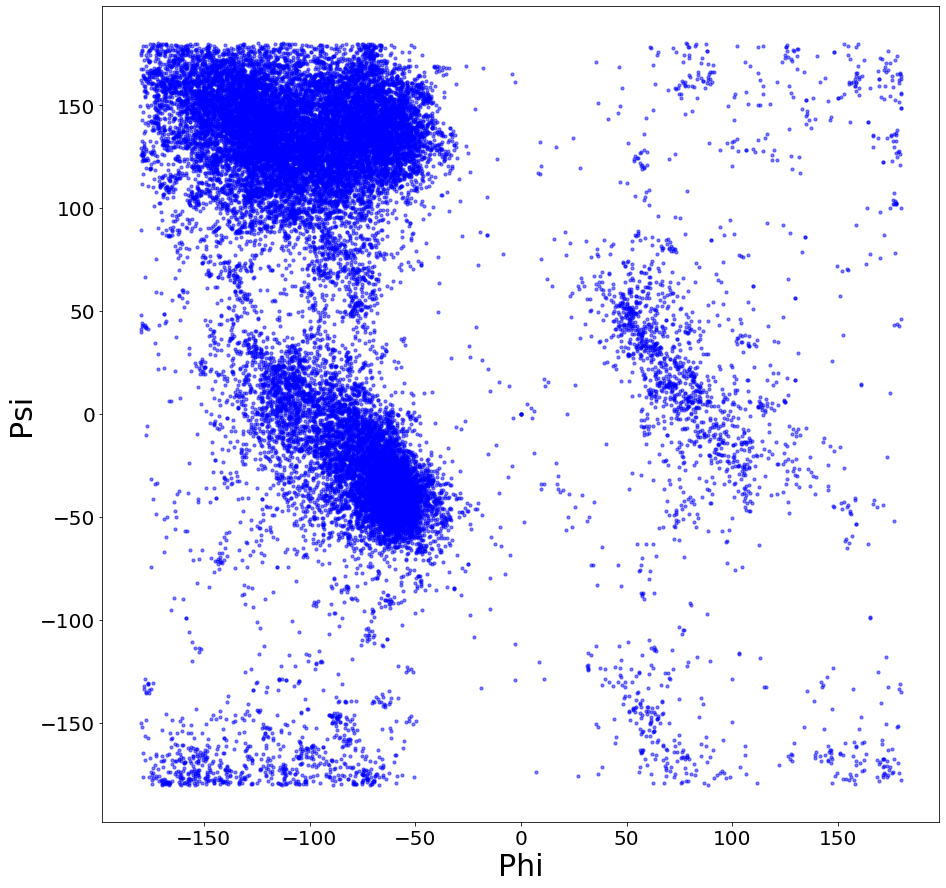

In [5]:
#Make the plot
x = all_protein["phi"]
y = all_protein["psi"]

plt.figure(figsize=(15,15))
plt.scatter(x, y, s=10, color="b", alpha=0.5)
plt.xlabel("Phi",fontsize=30)
plt.ylabel("Psi", fontsize=30)
plt.tick_params(axis="both",which="major",labelsize=20)

plt.show
plt.close

In [0]:
# Create a 2d array of phi_psi values
phi_psi = all_protein[["phi","psi"]]


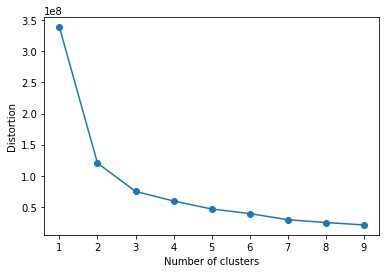

In [7]:
# Using the elbow method to find a good value for k
intertias = []
for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(phi_psi)
  intertias.append(kmeans.inertia_)
#Plot the elbowplot
plt.plot(range(1, 10), intertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


The elbow method gives us k=2 to be the "best" amount of cluster. However, considering there is a lot of noise in this dataset we don't think that k=2 is optimal. 

Text(0, 0.5, 'Psi')

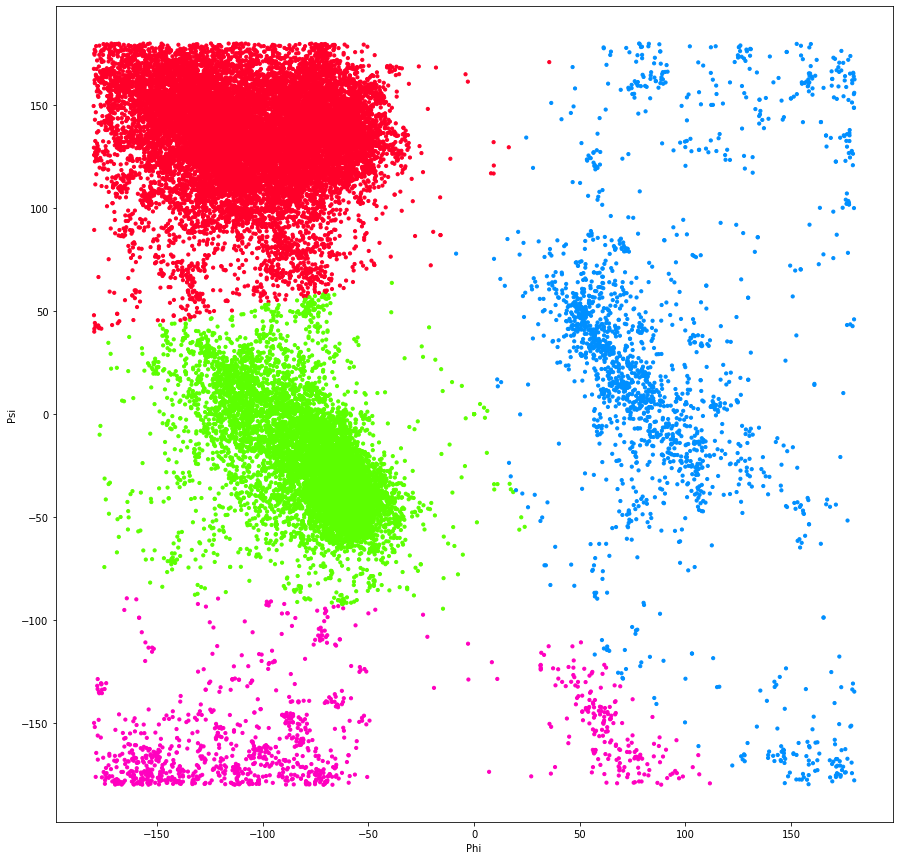

In [8]:
# Cluster the data using kmeans with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(phi_psi)

#y_pred contains the cluster for each protein
y_pred = kmeans.predict(phi_psi)

#plot the clusters
plt.figure(figsize=(15,15))
plt.scatter(x, y, c=y_pred, cmap="gist_rainbow", s=10)

plt.xlabel("Phi")
plt.ylabel("Psi")


We think that 4 is a good amount of clusters for this. If we choose more clusters, it will split the red/green clusters into two which we don't think it should.

# With shifted data
In the clusters above, the red cluster should be probably be part of the green cluster due to the periodic nature of angles. By shifting the data we can move our origo to a value that makes similar angles be near each other in the 2d-plane. We choose to shift with values that would not split major clusters.

In [0]:
phi_psi_modified = phi_psi.copy()
phi_psi_modified["psi"] = (phi_psi["psi"]+450)%360
phi_psi_modified["phi"] = (phi_psi["phi"]+360)%360

<function matplotlib.pyplot.close>

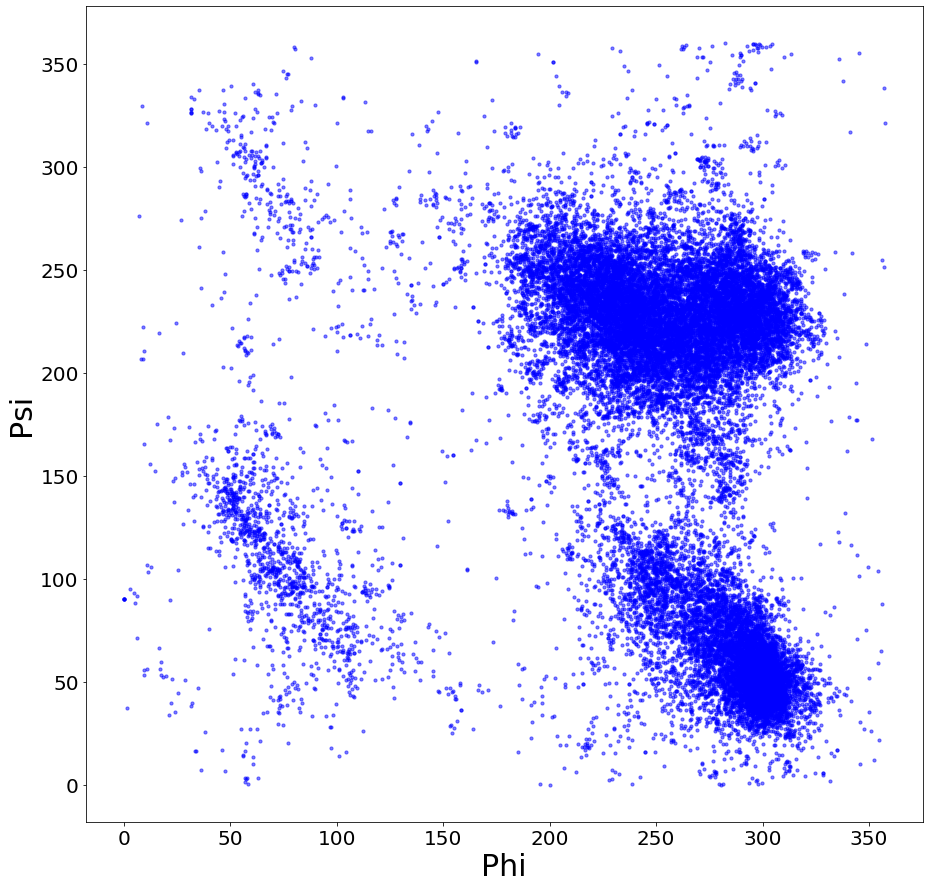

In [10]:
#Make the plot
x_modified = phi_psi_modified["phi"]
y_modified = phi_psi_modified["psi"]

plt.figure(figsize=(15,15))
plt.scatter(x_modified, y_modified, s=10, color="b", alpha=0.5)
plt.xlabel("Phi",fontsize=30)
plt.ylabel("Psi", fontsize=30)
plt.tick_params(axis="both",which="major",labelsize=20)

plt.show
plt.close

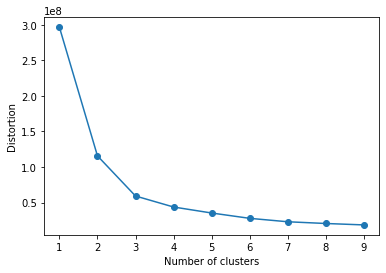

In [11]:

# Using the elbow method to find a good value for k on the shifted data
intertias_modified = []
for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(phi_psi_modified)
  intertias_modified.append(kmeans.inertia_)
#Plot the elbowplot
plt.plot(range(1, 10), intertias_modified, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Text(0, 0.5, 'Psi')

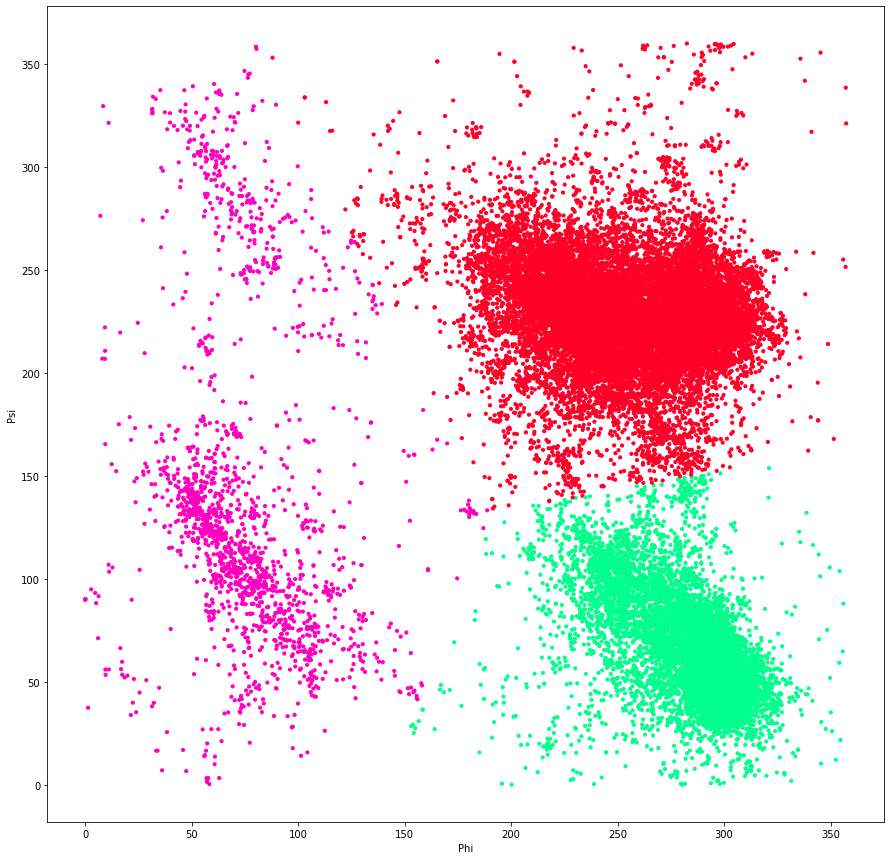

In [12]:
# Cluster the data using kmeans with 3 clusters using the shifted data
kmeans = KMeans(n_clusters=3)
kmeans.fit(phi_psi_modified)

#y_pred contains the cluster for each protein
y_pred_modified = kmeans.predict(phi_psi_modified)

#plot the clusters
plt.figure(figsize=(15,15))
plt.scatter(x_modified, y_modified, c=y_pred_modified, cmap="gist_rainbow", s=10)

plt.xlabel("Phi")
plt.ylabel("Psi")


# Moving on to DBSCAN

We will use the shifted data because it is better



In [0]:
# Compute DBSCAN
db = DBSCAN(eps=10, min_samples=100).fit(phi_psi_modified)
clusters = db.fit_predict(phi_psi_modified)



Text(0, 0.5, 'Psi')

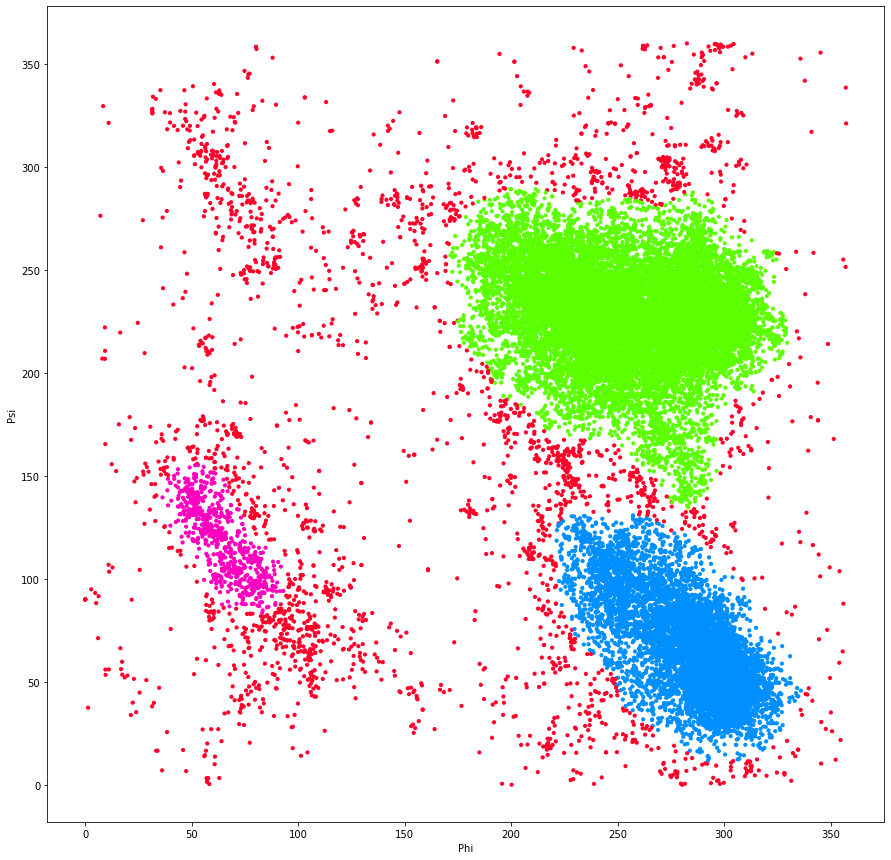

In [14]:
# Plot the clusters
plt.figure(figsize=(15,15))
plt.scatter(phi_psi_modified["phi"], phi_psi_modified["psi"], c=clusters, cmap="gist_rainbow", s=10)
plt.xlabel("Phi")
plt.ylabel("Psi")

n_outliers: 2604
n_clusters: 3


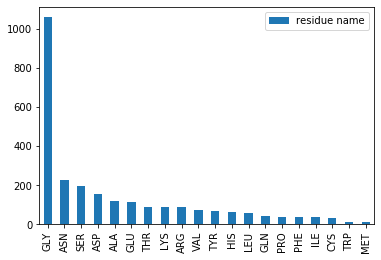

In [15]:
# Outliers
print("n_outliers:", list(db.labels_).count(-1))
print("n_clusters:", len(set(db.labels_))-1)
outliers = all_protein.iloc[[index for index, value in enumerate(db.labels_) if value == -1]]

outliers_counts = outliers["residue name"].value_counts().to_frame().plot.bar()

# Clustering for PRO

In [0]:
# Data fixing
pro = all_protein.copy()
pro = pro[pro["residue name"] == "PRO"]
phi_psi_pro = pro[["phi","psi"]]




In [0]:
# Clustering using KMeans using NON shifted data
kmeans_pro = KMeans(n_clusters=2)
kmeans_pro.fit(phi_psi_pro)

#y_pred contains the cluster for each protein
y_pred_pro = kmeans_pro.predict(phi_psi_pro)


 

Text(0, 0.5, 'Psi')

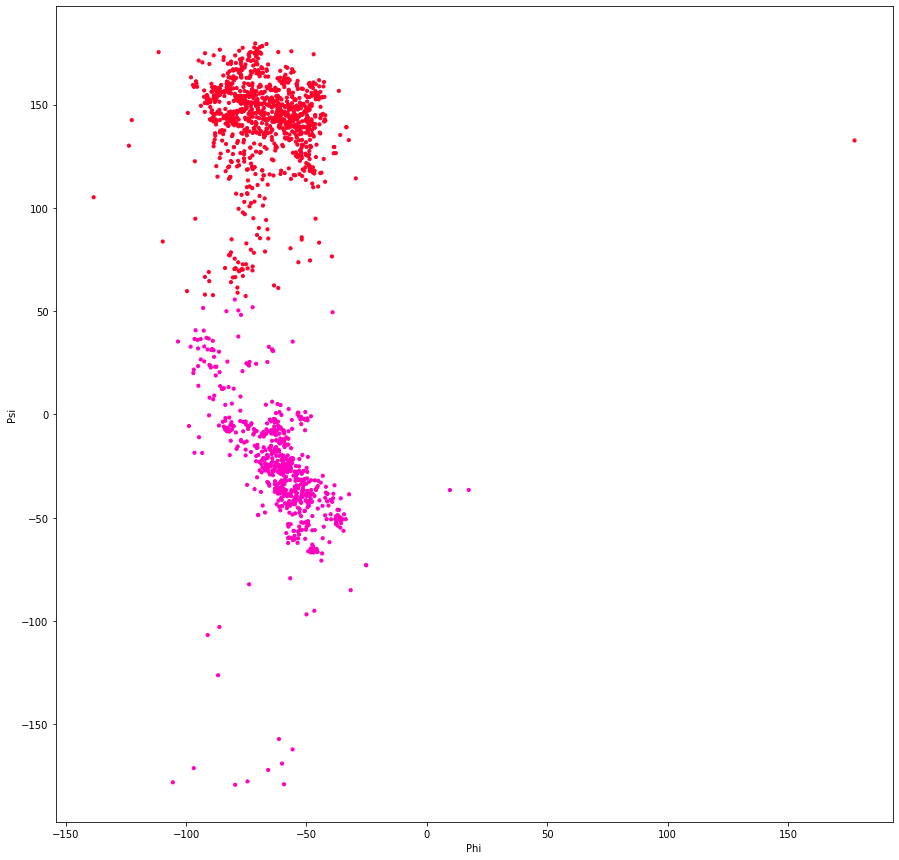

In [18]:
# Plot the cluster
plt.figure(figsize=(15,15))
plt.scatter(phi_psi_pro["phi"], phi_psi_pro["psi"], c=y_pred_pro, cmap="gist_rainbow", s=10)
 
plt.xlabel("Phi")
plt.ylabel("Psi")

# Clustering for GLY

In [0]:
# Data fixing
gly = all_protein.copy()
gly = gly[gly["residue name"] == "GLY"]
phi_psi_gly = gly[["phi","psi"]]



In [0]:
# Clustering using KMeans using NON shifted data
kmeans_gly = KMeans(n_clusters=6)
kmeans_gly.fit(phi_psi_gly)

#y_pred contains the cluster for each protein
y_pred_gly = kmeans_gly.predict(phi_psi_gly)

Text(0, 0.5, 'Psi')

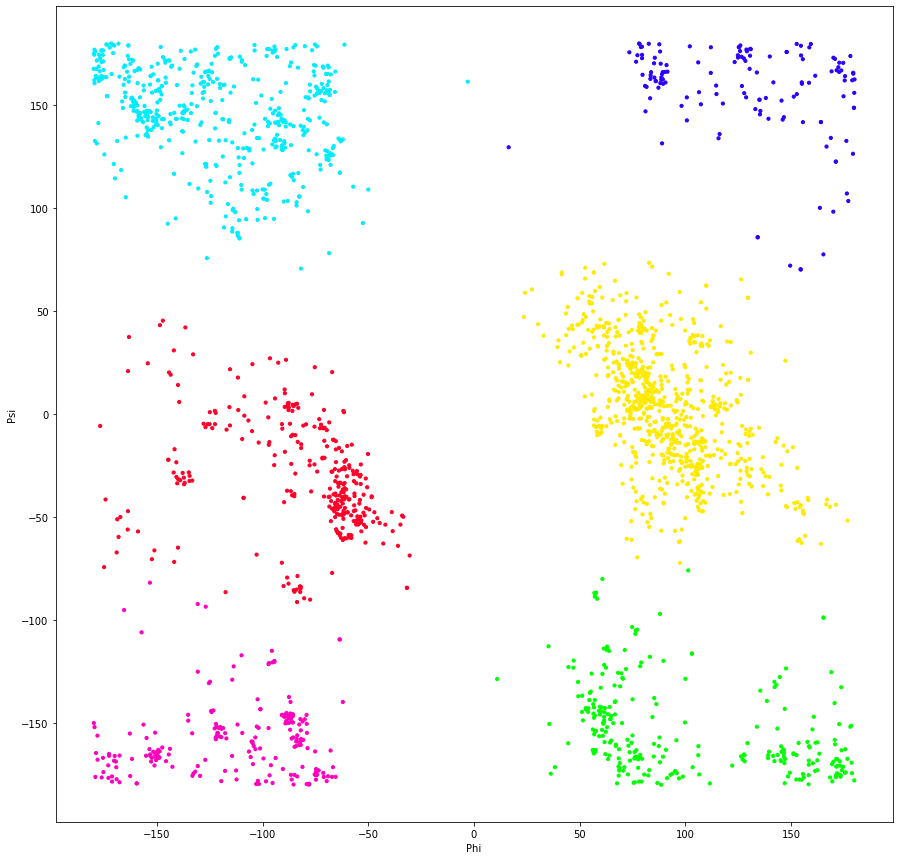

In [25]:
# Plot the cluster
plt.figure(figsize=(15,15))
plt.scatter(phi_psi_gly["phi"], phi_psi_gly["psi"], c=y_pred_gly, cmap="gist_rainbow", s=10)
 
plt.xlabel("Phi")
plt.ylabel("Psi")